In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [65]:
df = pd.read_csv(r"./telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [66]:
df.corr(method='spearman')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.015583,-0.259852,-0.102148,-0.102080,0.136657,0.170677,0.026311,0.094655,0.088582,0.060850
AccountWeeks,0.015583,1.000000,-0.029538,0.008741,0.016805,-0.005942,0.017884,0.032690,0.011784,-0.007956,0.014761
ContractRenewal,-0.259852,-0.029538,1.000000,-0.006006,-0.010479,0.030328,-0.049604,-0.013043,-0.044644,-0.010400,-0.043836
DataPlan,-0.102148,0.008741,-0.006006,1.000000,0.841275,-0.022156,0.002989,-0.012653,0.695608,0.022762,-0.004484
DataUsage,-0.102080,0.016805,-0.010479,0.841275,1.000000,-0.017852,-0.004309,-0.019481,0.646449,0.011492,0.076597
CustServCalls,0.136657,-0.005942,0.030328,-0.022156,-0.017852,1.000000,-0.015032,-0.020957,-0.025401,-0.017801,-0.017374
DayMins,0.170677,0.017884,-0.049604,0.002989,-0.004309,-0.015032,1.000000,0.009391,0.598887,0.006401,-0.016110
DayCalls,0.026311,0.032690,-0.013043,-0.012653,-0.019481,-0.020957,0.009391,1.000000,-0.009012,-0.014064,0.015139
MonthlyCharge,0.094655,0.011784,-0.044644,0.695608,0.646449,-0.025401,0.598887,-0.009012,1.000000,0.289230,0.055563
OverageFee,0.088582,-0.007956,-0.010400,0.022762,0.011492,-0.017801,0.006401,-0.014064,0.289230,1.000000,-0.003210


In [67]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [68]:
df['DayCalls'] = df['DayCalls'].astype(float)

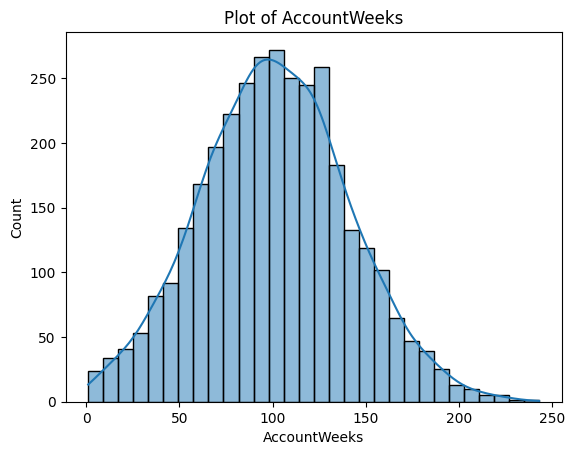

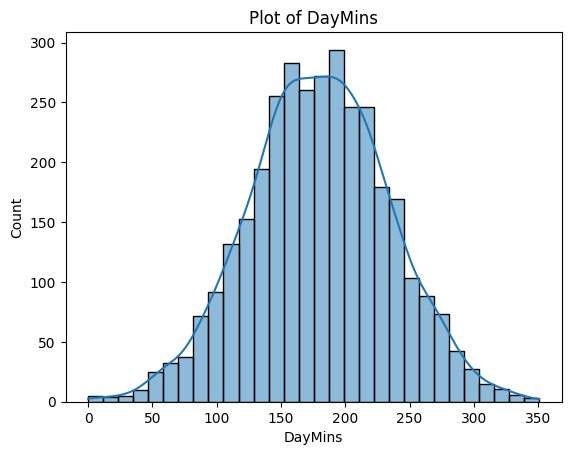

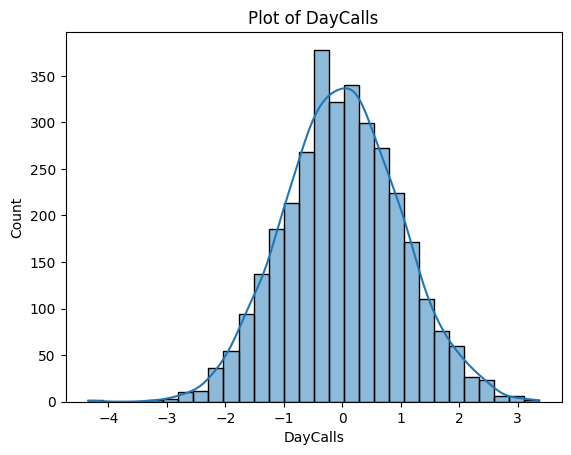

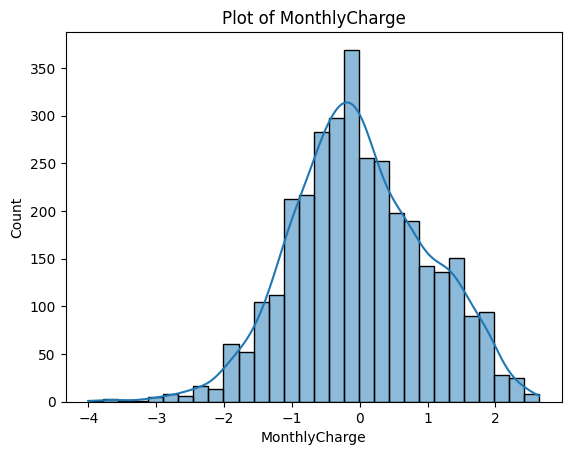

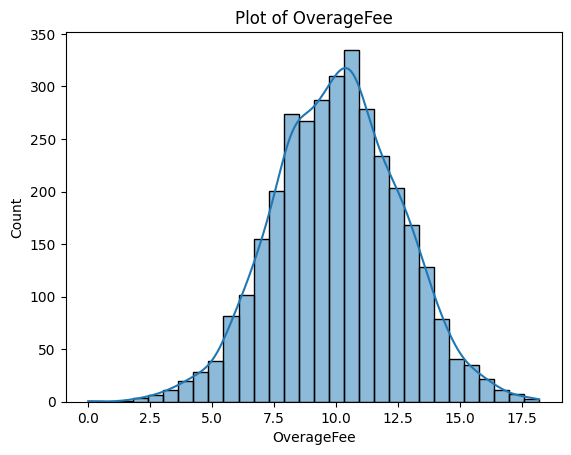

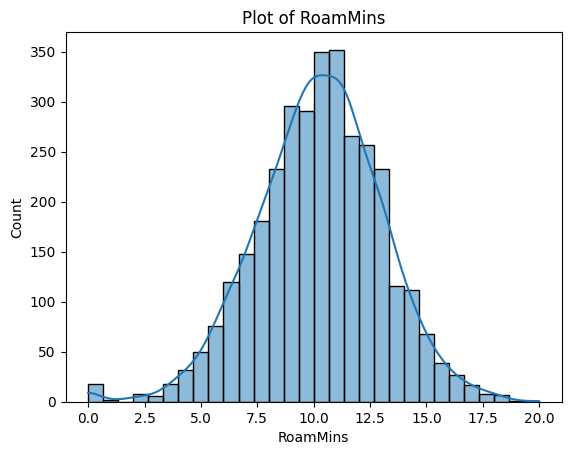

In [69]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
df.loc[:,'MonthlyCharge'] = scaler.fit_transform(df[['MonthlyCharge']])
df.loc[:,'DayCalls'] = scaler.fit_transform(df[['DayCalls']]+1)
for col in ['AccountWeeks','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']:
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Plot of {col}')
    plt.show()

In [70]:
from scipy.stats import pointbiserialr
for col in df.columns:
    corr, p_value = pointbiserialr(df['Churn'], df[col])
    print(corr,p_value)


0.999999999999986 0.0
0.01654074224367402 0.3397600070563792
-0.2598518473454798 1.4336058008673368e-52
-0.10214814067014594 3.4110371159471035e-09
-0.08719450893069779 4.6155489518516375e-07
0.20874999878379288 3.900360240192675e-34
0.20515082926138906 5.3002782274963586e-33
0.01982805931797988 0.25245803314270043
0.07244664693542069 2.833727583881407e-05
0.09281242645953124 7.968545135437853e-08
0.06823877562717681 8.057311265505246e-05


In [71]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information between features and target
mi = mutual_info_classif(df.drop(columns=['Churn']), df['Churn'])
print(mi)


[0.         0.02662666 0.00638079 0.         0.02816349 0.05403123
 0.0160785  0.07256186 0.         0.01528405]


In [72]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Apply Label Encoding or One-Hot Encoding on categorical features (if not done already)
#X_categorical = LabelEncoder().fit_transform(df['Categorical_Feature'])

# Apply MinMaxScaler to normalize feature values between 0 and 1
dfCR = MinMaxScaler().fit_transform(df.drop(columns=['Churn']))

# Perform Chi-square test
chi2_stat, p_values = chi2(dfCR, df['Churn'])
print(p_values)
formatted_array = [f"{num:.2f}" for num in p_values]

print(formatted_array)


[8.06972395e-01 3.01039128e-06 5.28486023e-07 2.28367132e-03
 2.37300676e-05 1.02160275e-02 8.43227351e-01 4.17611575e-01
 3.15051804e-01 4.42166309e-01]
['0.81', '0.00', '0.00', '0.00', '0.00', '0.01', '0.84', '0.42', '0.32', '0.44']


In [73]:
x = df.drop(columns=['Churn','DayCalls'])
y = df['Churn']

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
y = np.array(y)
x = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
lr = LogisticRegression()
lr.fit(x_train_s,y_train)
y_pred = lr.predict(x_test_s)
print("Acurracy: ",accuracy_score(y_pred,y_test))

Acurracy:  0.8605697151424287


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtg = DecisionTreeClassifier(random_state=2)
params = {
    'max_depth':[2,3,5,7,9,11,8]
}
dtg = GridSearchCV(dtg, param_grid=params,cv=5, n_jobs=-1)
dtg.fit(x_train,y_train)
y_pred = dtg.best_estimator_.predict(x_test)
print("Best params: ",dtg.best_params_)
print("Acurracy: ",accuracy_score(y_pred,y_test))


Best params:  {'max_depth': 5}
Acurracy:  0.9100449775112444
